In [2]:
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, accuracy_score

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


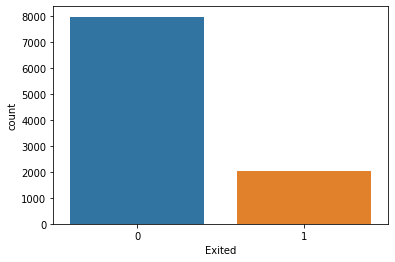

In [8]:
sb.countplot(data['Exited'])
plt.show()

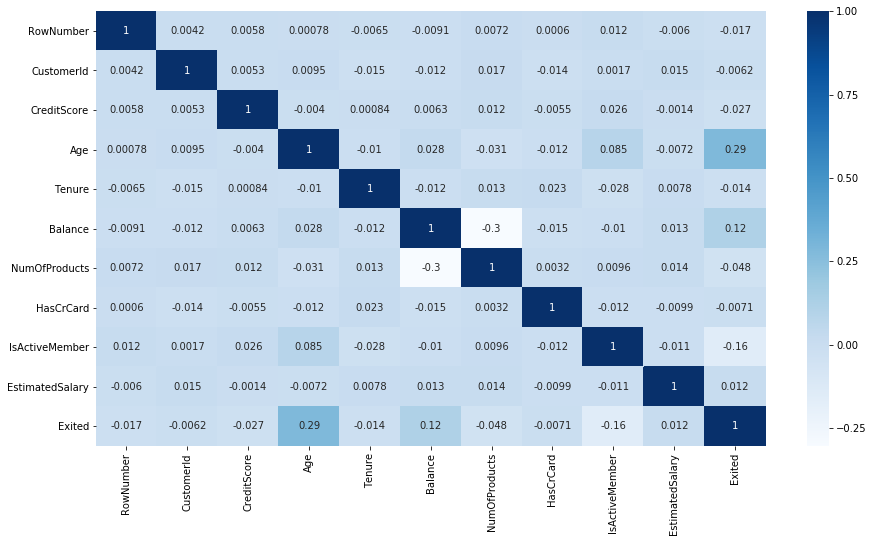

In [9]:
fig, ax = plt.subplots(figsize = (15, 8))
sb.heatmap(data.corr(), annot = True, cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [10]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [11]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Applying Standard Scaler

In [12]:
sc = StandardScaler()
data.iloc[:, [0,3,5,9]] = sc.fit_transform(data.iloc[:, [0,3,5,9]])

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


# Splitting Input and Output

In [14]:
X = data.iloc[:, 0:-1].values
Y = data.iloc[:, -1:].values

In [15]:
X

array([[-0.3262214220367463, 'France', 'Female', ..., 1, 1,
        0.021886493995386117],
       [-0.4400359548576657, 'Spain', 'Female', ..., 0, 1,
        0.21653375188734025],
       [-1.536794180222889, 'France', 'Female', ..., 1, 0,
        0.24068690006348814],
       ...,
       [0.6049883919525944, 'France', 'Female', ..., 0, 1,
        -1.0086430751933764],
       [1.2568352617451328, 'Germany', 'Male', ..., 1, 0,
        -0.12523071253853688],
       [1.4637707759649863, 'France', 'Female', ..., 1, 0,
        -1.07636975538291]], dtype=object)

In [16]:
Y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

# Applying One hot encoding

In [17]:
lb = LabelEncoder()
X[:, 1] = lb.fit_transform(X[:, 1])
X[:, 2] = lb.fit_transform(X[:, 2])

In [18]:
ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()

In [19]:
X[0:3]

array([[ 1.        ,  0.        ,  0.        , -0.32622142,  0.        ,
         0.29351742,  2.        , -1.22584767,  1.        ,  1.        ,
         1.        ,  0.02188649],
       [ 0.        ,  0.        ,  1.        , -0.44003595,  0.        ,
         0.19816383,  1.        ,  0.11735002,  1.        ,  0.        ,
         1.        ,  0.21653375],
       [ 1.        ,  0.        ,  0.        , -1.53679418,  0.        ,
         0.29351742,  8.        ,  1.33305335,  3.        ,  1.        ,
         0.        ,  0.2406869 ]])

In [20]:
X.shape

(10000, 12)

In [21]:
X = X[:,1:]

In [22]:
X.shape

(10000, 11)

In [23]:
X[0]

array([ 0.        ,  0.        , -0.32622142,  0.        ,  0.29351742,
        2.        , -1.22584767,  1.        ,  1.        ,  1.        ,
        0.02188649])

# Splitting data in to training and testing

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000, 1), (2000, 1))

# Building the Artificial Neural Network

The input layer is the number of features in data(11 in this case)

hidden1 = Hidden layer1 which contains 6 neurons

hidden2 = Hidden layer2 which contains 6 neurons

hidden3 = Hidden layer3 which contains 6 neurons

In [26]:
n_features = x_train.shape[1]
node1 = 6
node2 = 10
node3 = 5

# Place Holders 

We need two placeholders in order to fit our model

x = contains the network's inputs 

y = contains the network's outputs


In [27]:
x = tf.placeholder(dtype = tf.float64, shape = [None, n_features])
y = tf.placeholder(dtype = tf.float64, shape = [None, 1])

# Variables

 While placeholders are used to store input and target data in the graph, variables are used as flexible containers within the graph that are allowed to change during graph execution. Here Weights and Biases are represented as variables in order to adapt during training. Variables need to be initialized, prior to model training.

# Initializers

Initializers are used to initialize the network’s variables before training. 

There are different initializers available in Tensor flow, each with different initialization approaches. Here, we will use which is one of the default initialization strategies the tf.variancescalinginitializer() for two variables weight & bias.

In [28]:
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode = 'fan_avg', distribution = 'uniform', scale = sigma) 
bias_initializer = tf.zeros_initializer()

# Designing the network architecture

In designing the network architecture, 1st we need to understand the required variable dimensions between input, hidden and output layers. In case of multilayer perceptron (MLP), the network type we use here, the second dimension of the previous layer is the first dimension in the current layer for weight matrices. It means each layer passing its output as input to the next layer. The biases dimension equals the second dimension of the current layer’s weight matrix, which corresponds the number of neurons in this layer.

In [29]:
#Layer1 - variables for hidden weights and biases
w_hidden1 = tf.Variable(weight_initializer([n_features, node1], dtype = tf.float64))
bias_hidden1 = tf.Variable(bias_initializer([node1], dtype = tf.float64))


#Layer2 - variables for hidden weights and biases
w_hidden2 = tf.Variable(weight_initializer([node1, node2], dtype = tf.float64))
bias_hidden2 = tf.Variable(bias_initializer([node2], dtype = tf.float64))


#Layer3 - variables for hidden weights and biases
w_hidden3 = tf.Variable(weight_initializer([node2, node3], dtype = tf.float64))
bias_hidden3 = tf.Variable(bias_initializer([node3], dtype = tf.float64))


#Output Layer Weights
W_out = tf.Variable(weight_initializer([node3, 1], dtype = tf.float64))
bias_out = tf.Variable(bias_initializer([1], dtype = tf.float64))
 
init = tf.global_variables_initializer()

After definition of the required weight and bias variables, the network topology, the architecture of the network, needs to be specified. Hereby, placeholders (data) and variables (weights and biases) need to be combined into a system of sequential matrix multiplications. Furthermore, the hidden layers of the network are transformed by activation functions. 

In [30]:
#Hidden Layer
hidden1 = tf.nn.relu(tf.add(tf.matmul(x, w_hidden1), bias_hidden1))
hidden2 = tf.nn.relu(tf.add(tf.matmul(hidden1, w_hidden2), bias_hidden2))
hidden3 = tf.nn.relu(tf.add(tf.matmul(hidden2, w_hidden3), bias_hidden3))

#Output Layer with linear activation
out = tf.add(tf.matmul(hidden3, W_out), bias_out)


# Cost function


We use cost function to optimize the model. The cost function is used to generate a measure of deviation between the network’s predictions and the actual observed training targets. For regression problems, the mean squared error (MSE) function is commonly used. MSE computes the average squared deviation between predictions and targets.

In [31]:
cost_function = tf.reduce_mean(tf.squared_difference(out, y))

# Optimizer

In [32]:
learning_rate = 0.01
opt = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

# launching the graph in Session

In [33]:
sess = tf.Session()
sess.run(init)

In [34]:
epoch = 8000
for i in range(epoch):
    sess.run(opt, feed_dict = {x:x_train, y:y_train})

In [35]:
# correct_prediction

In [36]:
y_pred = sess.run(out, feed_dict = {x:x_test})

In [37]:
y_pred

array([[0.1774834 ],
       [0.31258671],
       [0.1422084 ],
       ...,
       [0.18615518],
       [0.12081956],
       [0.09194998]])

In [38]:
y_pred = (y_pred > 0.5)

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1532,   63],
       [ 302,  103]])

In [40]:
score = accuracy_score(y_test, y_pred)
score

0.8175